# E-commerce Customer Segmentation


## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Loading and Previewing the Dataset


In [2]:
data = pd.read_excel(r"C:\Users\manik\Desktop\Final project\cust_data.xlsx")
print(data.head())
data.head(10)


   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Handling Missing Values


In [3]:
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Handle missing values in the "Gender" column by imputing with mode
mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(mode_gender, inplace=True)

print(data.isnull().sum())


Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

C:\Users\manik\AppData\Local\Temp\ipykernel_28432\1644165383.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(mode_gender, inplace=True)


## Data Visualization


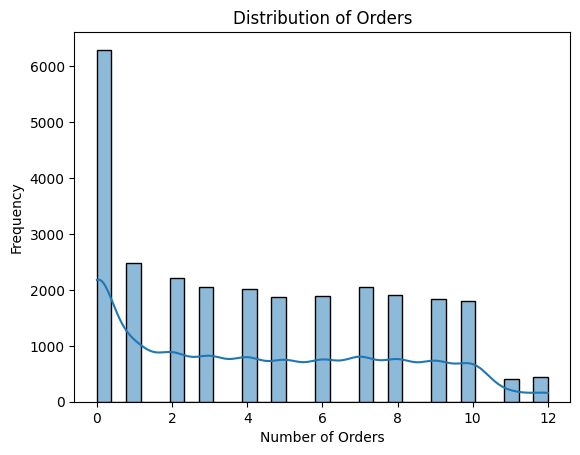

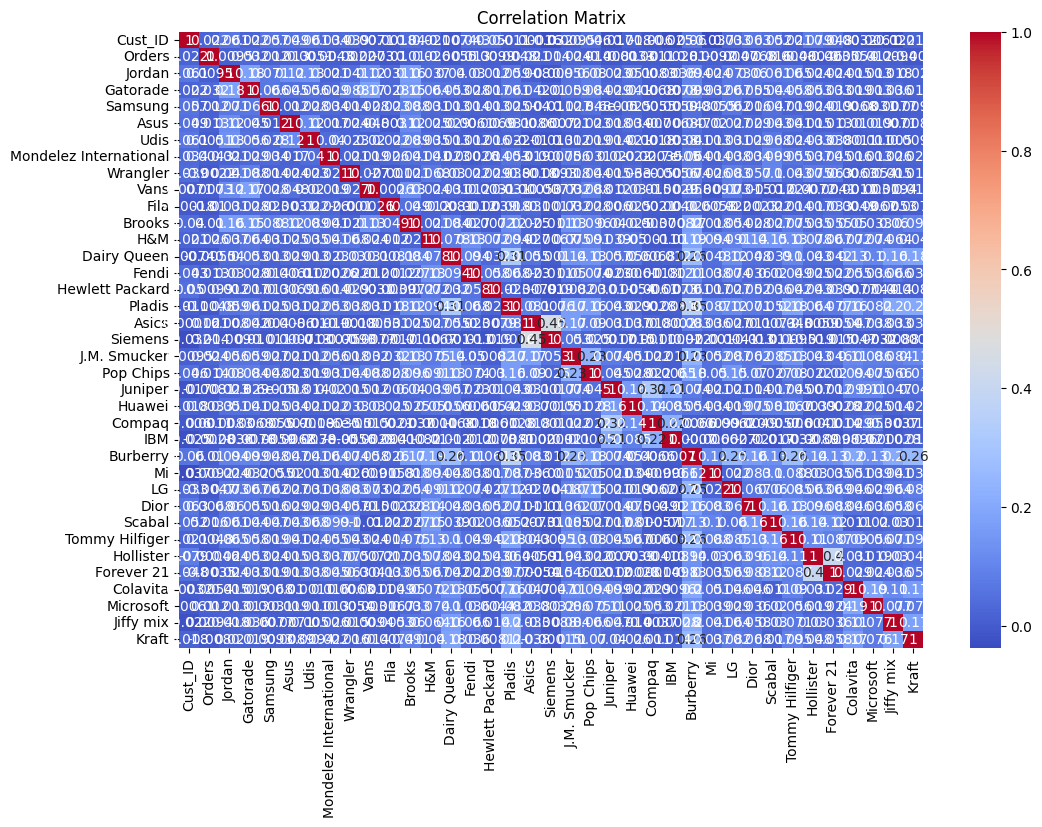

In [4]:
sns.histplot(data['Orders'], kde=True)
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation between Orders and brand searches
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Feature Selection and Scaling


In [5]:
# Select relevant features (brand searches)
brand_searches = data.iloc[:, 3:]
brand_searches


,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
scaler = StandardScaler()
brand_searches_scaled = scaler.fit_transform(brand_searches)


## Applying PCA and Determining Optimal Clusters


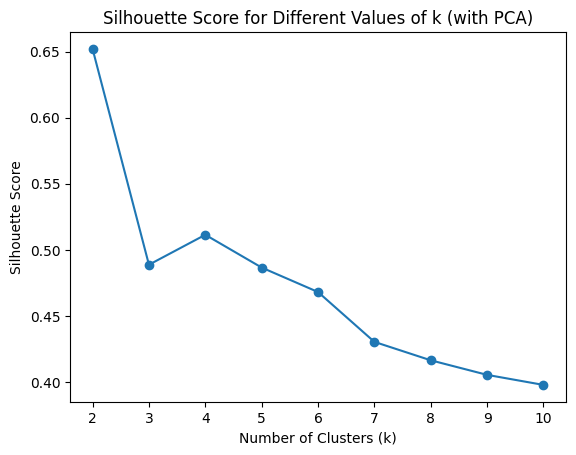

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
brand_searches_pca = pca.fit_transform(brand_searches_scaled)

# Determine the optimal number of clusters (k) using silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(brand_searches_pca)
    score = silhouette_score(brand_searches_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Visualize silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k (with PCA)')
plt.show()


## Analyzing and Visualizing Clusters


Cluster Counts:
Cluster
0    24383
1     2893
Name: count, dtype: int64


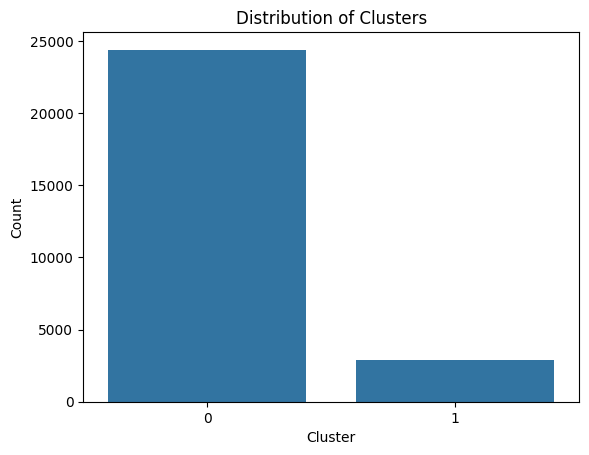

In [8]:
# Choose the optimal number of clusters (e.g., from the silhouette score plot)
optimal_k = 2  # Change this to the value you determined

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(brand_searches_scaled)

# Get cluster labels for each customer
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Analyze and interpret the clustering results
cluster_counts = data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Visualize the distribution of clusters
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


## Cluster Profile Analysis


Mean Values of Features for Each Cluster:
           Orders    Jordan  Gatorade   Samsung     Asus      Udis  \
Cluster                                                              
0        4.225239  0.227987  0.222163  0.198540  0.14666  0.124800   
1        4.408227  0.688904  0.605254  0.471483  0.35223  0.338749   

         Mondelez International  Wrangler      Vans      Fila  ...        LG  \
Cluster                                                        ...             
0                      0.121970  0.087889  0.095681  0.085059  ...  0.056720   
1                      0.312133  0.284480  0.270999  0.172485  ...  0.490149   

             Dior    Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
Cluster                                                                        
0        0.201165  0.318090        0.098921   0.047287    0.032359  0.137022   
1        0.877290  0.871414        0.676115   0.334946    0.267542  0.671967   

         Microsoft  Jiffy mix     K

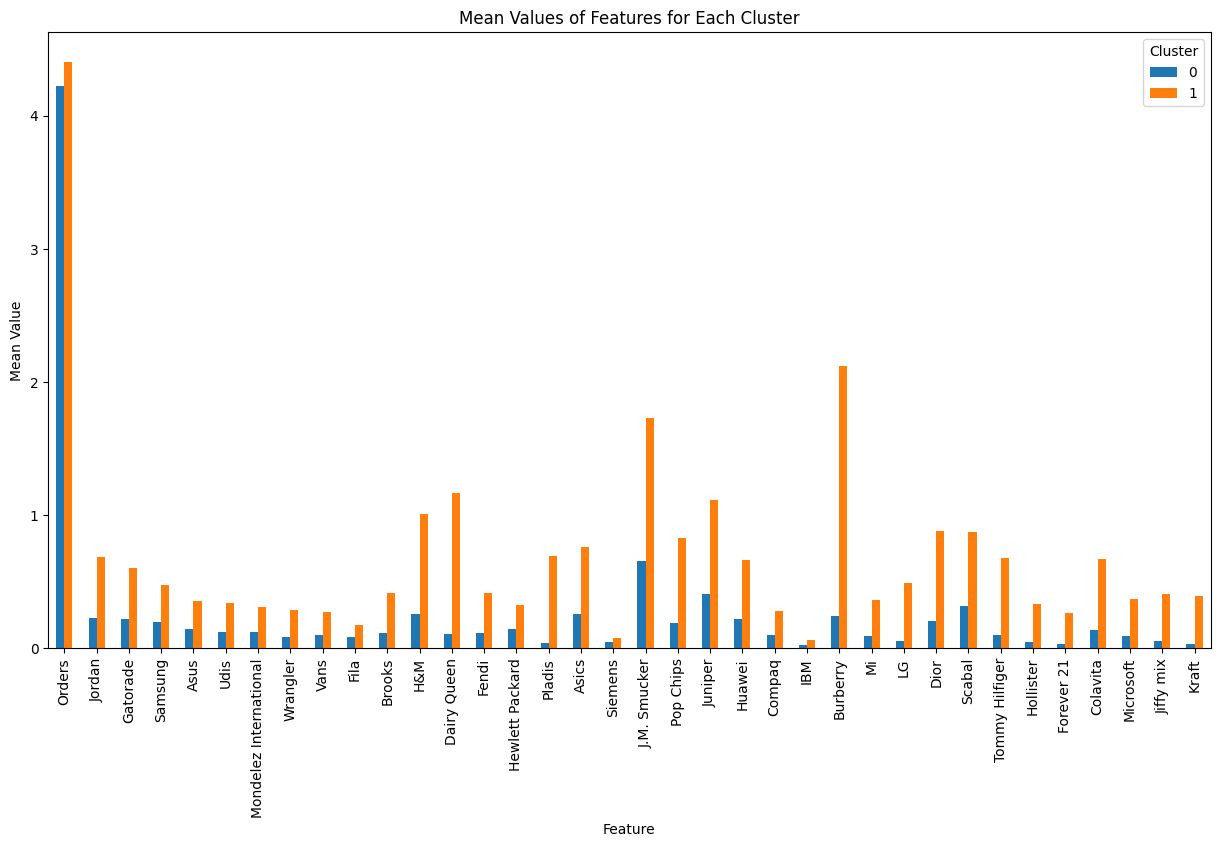

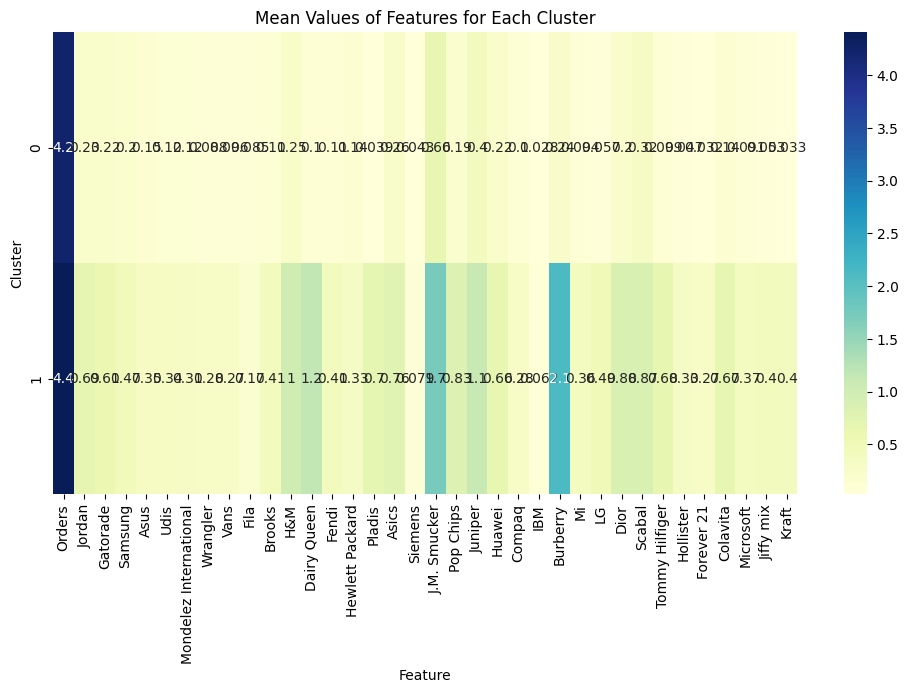

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'Cust_ID' and 'Cluster' columns

# Ensure 'Cust_ID' is set as index if it's a column
if 'Cust_ID' in data.columns:
    data.set_index('Cust_ID', inplace=True)

# Ensure 'Cluster' is a column in the DataFrame
if 'Cluster' not in data.columns:
    raise ValueError("The DataFrame must contain a 'Cluster' column for grouping.")

# Identify numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Filter data to include only numeric columns
numeric_data = data[numeric_cols]

# Include 'Cluster' column for grouping
if 'Cluster' not in numeric_data.columns:
    numeric_data = pd.concat([data['Cluster'], numeric_data], axis=1)

# Calculate the mean values of original features within each cluster
cluster_means = numeric_data.groupby('Cluster').mean()

# Display the mean values of features for each cluster
print("Mean Values of Features for Each Cluster:")
print(cluster_means)

# Transpose the DataFrame for better visualization
cluster_means_transposed = cluster_means.T

# Visualize the characteristics of each cluster using bar plots
cluster_means_transposed.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

# Visualize the mean values of features for each cluster
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu')
plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()


